# Load the libraries

In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm
import matplotlib.colorbar
import matplotlib.colors
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from Modules.Distributions import Gaussian1D
from Modules.Metrics import Accuracy, Precision, Recall, F1score
from Modules.SupervisedLearning import NaiveBayesClassifier, BayesClassifier, kNNClassifier, ParzenWindow
from Modules.UnsupervisedLearning import kmeansClassifier
from Modules.Visualizers import VisualizePCA, PCA

# Load Medical dataset

In [2]:
def LoadData(type = "Standardized"):
    medical_data = pd.read_csv("data/Medical_data.csv")
    medical_data_test = pd.read_csv("data/test_medical.csv")

    x = medical_data.drop("Health", axis = 1).values
    y = medical_data["Health"].values
    xt = medical_data_test.drop("Health",axis = 1).values
    yt = medical_data_test["Health"].values

    if(type == "Standardized"):
        train_mu = x.mean(axis = 0)
        train_sigma = np.sqrt(x.var(axis = 0))

        x_ = (x - train_mu) / train_sigma

        x_train = x_
        y_train = y.copy()

        x_test = (xt.copy() - train_mu) / train_sigma
        y_test = yt.copy()
    else:
        x_train = x
        y_train = y

        x_test = xt
        y_test = yt
    
    y_ = y_train.copy()
    y_[y_ == "HEALTHY"] = 0
    y_[y_ == "SURGERY"] = 1
    y_[y_ == "MEDICATION"] = 2

    return medical_data, x_train, y_train, x_test, y_test, y_

medical_data, x_train, y_train, x_test, y_test, y_ = LoadData()

# Data visualization

<IPython.core.display.Javascript object>


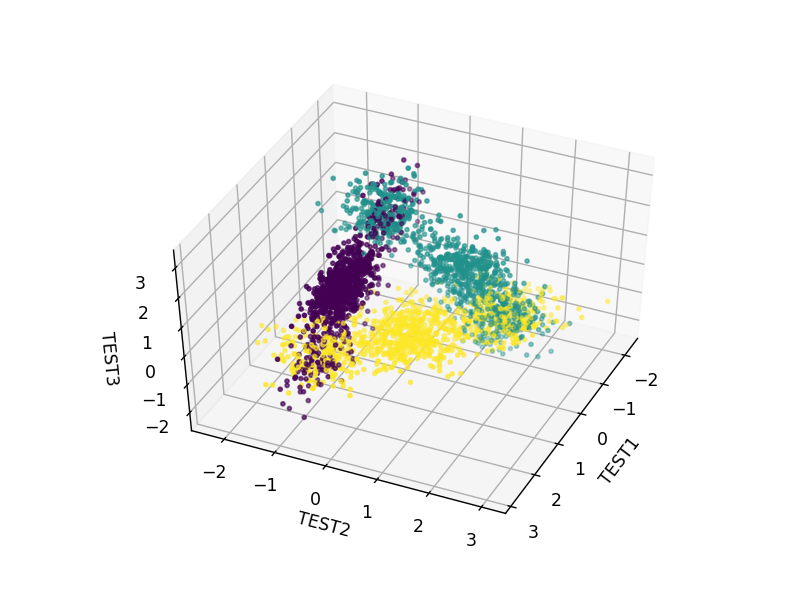

Text(0.5,0,'TEST3')

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(x_train[:, 0], x_train[:, 1], x_train[:, 2], c = y_, marker = ".")

ax.set_xlabel("TEST1")
ax.set_ylabel("TEST2")
ax.set_zlabel("TEST3")

In [3]:
def FindGaussians(x_train):
    num_samples = x_train.shape[0]
    h = 0.5

    prob = []
    for i in range(num_samples):
        x_ = x_train - x_train[i, :]
        x_ = np.abs(x_).max(axis = 1)
        temp_ = x_ < h / 2

#         temp_ = y[temp_]
        count = temp_.sum()

        prob.append(count)

    return np.array(prob)

prob = FindGaussians(x_train)
    # num_test_samples = x.shape[0]
    # h = 0.1

    # prob = []
    # for i in range(num_test_samples):
    #     x_ = x - x[i, :]
    #     x_ = np.exp(-(np.linalg.norm(x_, axis = 1) ** 2) / (2 * h ** 2))

    #     prob.append(x_.sum())

    # prob = np.array(prob)

<IPython.core.display.Javascript object>


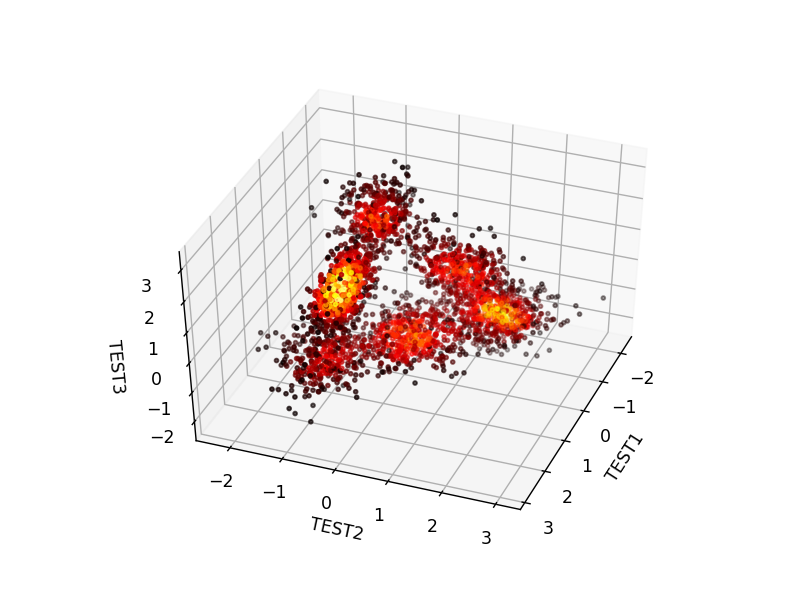

Text(0.5,0,'TEST3')

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(x_train[:, 0], x_train[:, 1], x_train[:, 2], c = prob, cmap = "hot", marker = ".")
ax.set_xlabel("TEST1")
ax.set_ylabel("TEST2")
ax.set_zlabel("TEST3")

Text(0,0.5,'TEST3')

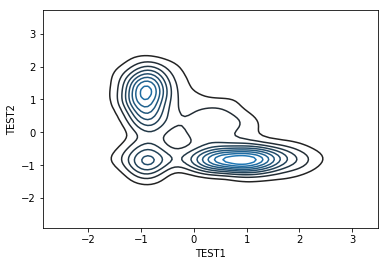

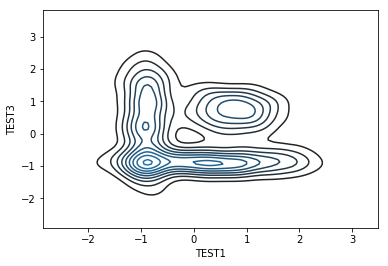

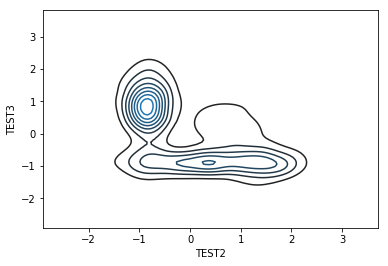

In [4]:
# x_train, x_test, p = PCA(x_train, x_test, p = 2)

plt.figure()
sns.kdeplot(x_train[:,0:2])
plt.xlabel("TEST1")
plt.ylabel("TEST2")

plt.figure()
sns.kdeplot(np.concatenate([x_train[:, 0].reshape(x_train.shape[0], 1), x_train[:, 2].reshape(x_train.shape[0], 1)], axis = 1))
plt.xlabel("TEST1")
plt.ylabel("TEST3")

plt.figure()
sns.kdeplot(np.concatenate([x_train[:, 1].reshape(x_train.shape[0], 1), x_train[:, 2].reshape(x_train.shape[0], 1)], axis = 1))
plt.xlabel("TEST2")
plt.ylabel("TEST3")

# Naive Bayes classifier

Text(0.5,1,'class_conditional for MEDICATION')

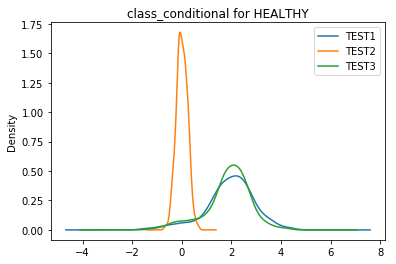

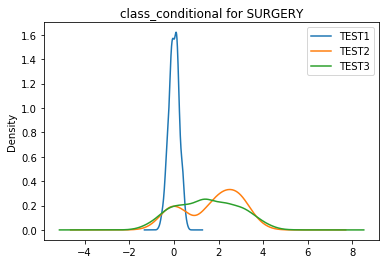

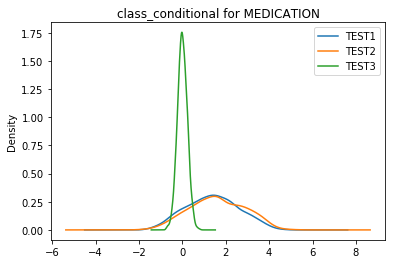

In [4]:
medical_data[medical_data["Health"] == "HEALTHY"].plot(kind = "kde")
plt.title("class_conditional for HEALTHY")

medical_data[medical_data["Health"] == "SURGERY"].plot(kind = "kde")
plt.title("class_conditional for SURGERY")

medical_data[medical_data["Health"] == "MEDICATION"].plot(kind = "kde")
plt.title("class_conditional for MEDICATION")

# TEST1
# HEALTHY peaks once
# SURGERY peaks once
# MEDICATION peaks once

# TEST2:
# HEALTHY peaks once
# SURGERY peaks twice
# MEDICATION peaks twice

# TEST3:
# HEALTHY peaks once
# SURGERY peaks twice
# MEDICATION peaks once

## Naive Bayes classifier (MLE)

Training accuracy: 0.9066666666666666
Test Accuracy = 0.8986666666666666
Precision = {'MEDICATION': array([0.9037871]), 'HEALTHY': array([0.9458897]), 'SURGERY': array([0.85122411])}
Recall = {'MEDICATION': array([0.883]), 'HEALTHY': array([0.909]), 'SURGERY': array([0.904])}
F1score = {'MEDICATION': array([0.89327264]), 'HEALTHY': array([0.92707802]), 'SURGERY': array([0.87681862])}


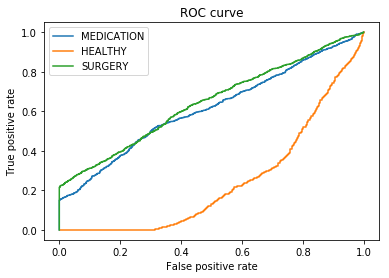

In [6]:
num_alphas = {
    "HEALTHY" : np.array([1, 1, 1]),
    "SURGERY" : np.array([1, 1, 1]),
    "MEDICATION" : np.array([1, 1, 1])
}

classifier = NaiveBayesClassifier(algorithm = "MLE")
classifier.Fit(x_train, y_train, num_alphas, roc_plot = True)
print("Training accuracy:", classifier.training_accuracy)

predictions = classifier.Predict(x_test)
print("Test Accuracy =", Accuracy(predictions, y_test))
print("Precision =", Precision(predictions, y_test))
print("Recall =", Recall(predictions, y_test))
print("F1score =", F1score(predictions, y_test))

## Naive Bayes classifier (EM)

In [7]:
num_alphas = {
    "HEALTHY" : np.array([1, 1, 1]),
    "SURGERY" : np.array([1, 2, 2]),
    "MEDICATION" : np.array([1, 2, 1])
}

classifier = NaiveBayesClassifier(algorithm = "EM")
classifier.Fit(x_train, y_train, num_alphas)
print("Training accuracy:", classifier.training_accuracy)

predictions = classifier.Predict(x_test)
print("Test Accuracy =", Accuracy(predictions, y_test))
print("Precision =", Precision(predictions, y_test))
print("Recall =", Recall(predictions, y_test))
print("F1score =", F1score(predictions, y_test))

Training accuracy: 0.9096666666666666
Test Accuracy = 0.8996666666666666
Precision = {'SURGERY': array([0.83588819]), 'HEALTHY': array([0.96459227]), 'MEDICATION': array([0.91032325])}
Recall = {'SURGERY': array([0.927]), 'HEALTHY': array([0.899]), 'MEDICATION': array([0.873])}
F1score = {'SURGERY': array([0.87908962]), 'HEALTHY': array([0.93064182]), 'MEDICATION': array([0.89127106])}


# Class conditional densities

HEALTHY


<IPython.core.display.Javascript object>


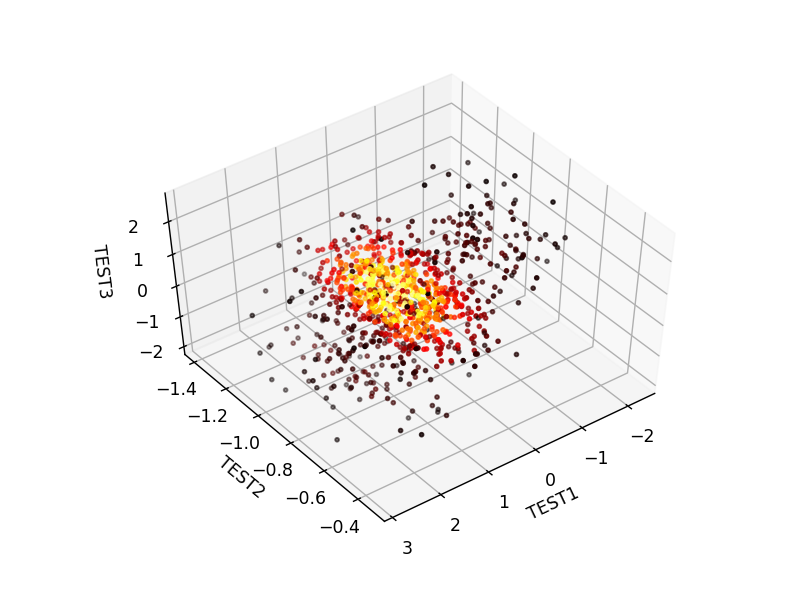

SURGERY


<IPython.core.display.Javascript object>


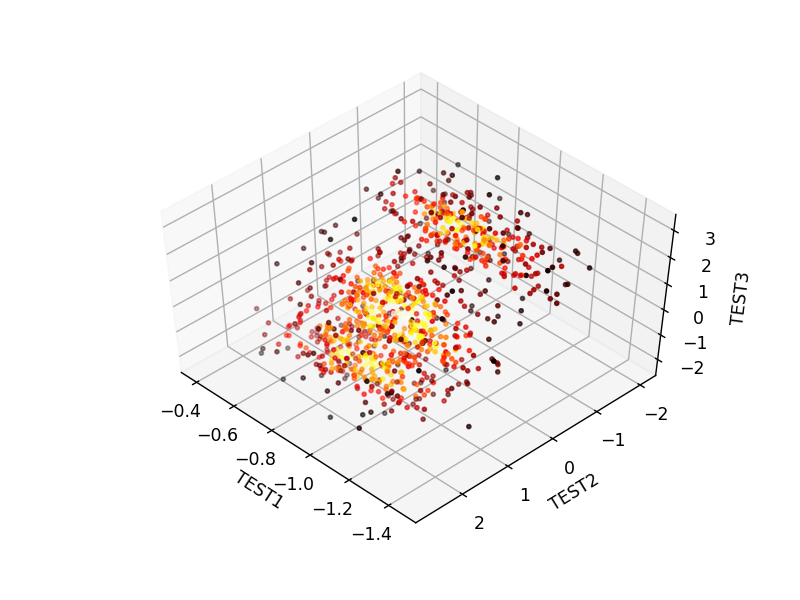

MEDICATION


<IPython.core.display.Javascript object>


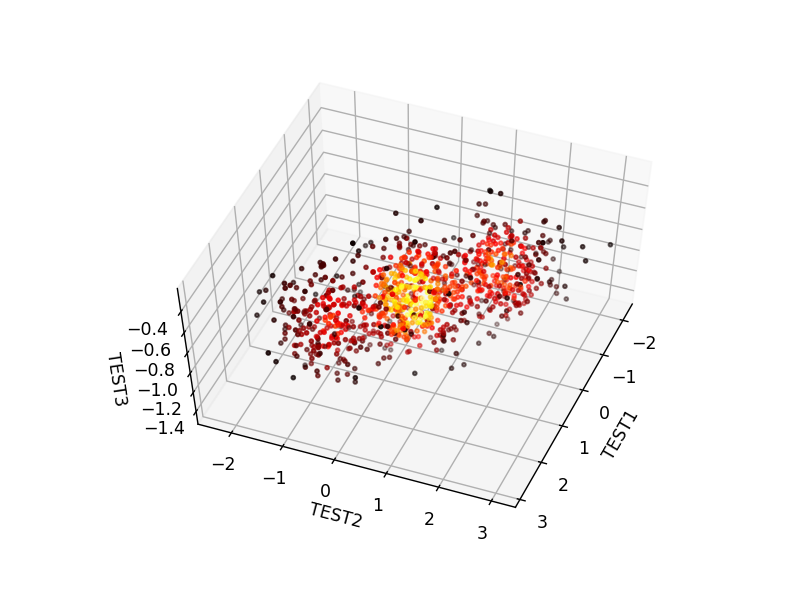

Text(0.5,0,'TEST3')

In [5]:
print("HEALTHY")
q_ = x_train[y_train == "HEALTHY", :]
prob = FindGaussians(q_)
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(q_[:, 0], q_[:, 1], q_[:, 2], c = prob, cmap = "hot", marker = ".")
ax.set_xlabel("TEST1")
ax.set_ylabel("TEST2")
ax.set_zlabel("TEST3")

print("SURGERY")
q_ = x_train[y_train == "SURGERY", :]
prob = FindGaussians(q_)
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(q_[:, 0], q_[:, 1], q_[:, 2], c = prob, cmap = "hot", marker = ".")
ax.set_xlabel("TEST1")
ax.set_ylabel("TEST2")
ax.set_zlabel("TEST3")

print("MEDICATION")
q_ = x_train[y_train == "MEDICATION", :]
prob = FindGaussians(q_)
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(q_[:, 0], q_[:, 1], q_[:, 2], c = prob, cmap = "hot", marker = ".")
ax.set_xlabel("TEST1")
ax.set_ylabel("TEST2")
ax.set_zlabel("TEST3")

HEALTHY
SURGERY
MEDICATION


Text(0,0.5,'TEST3')

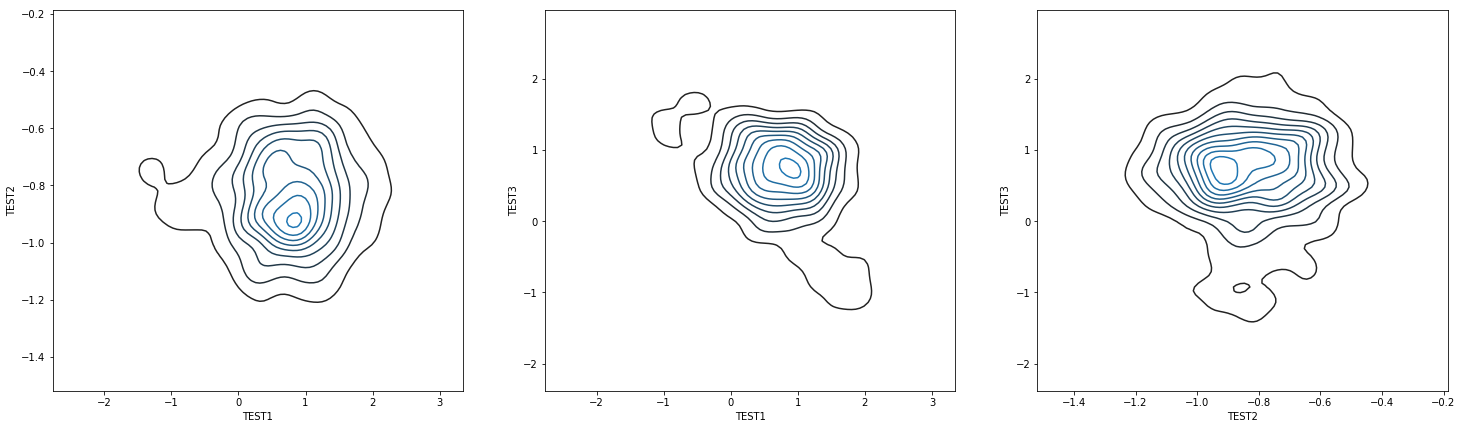

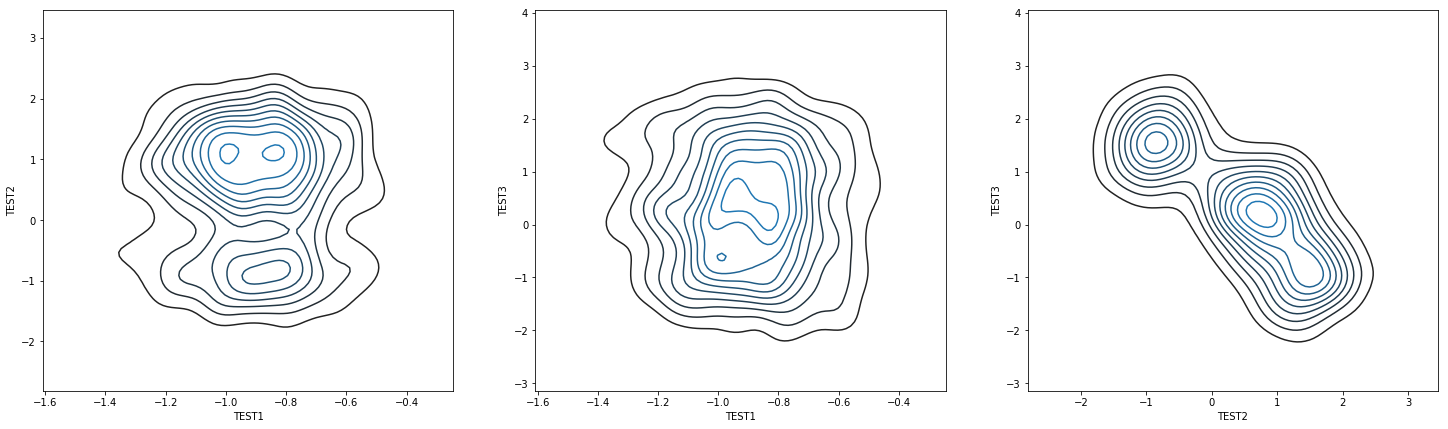

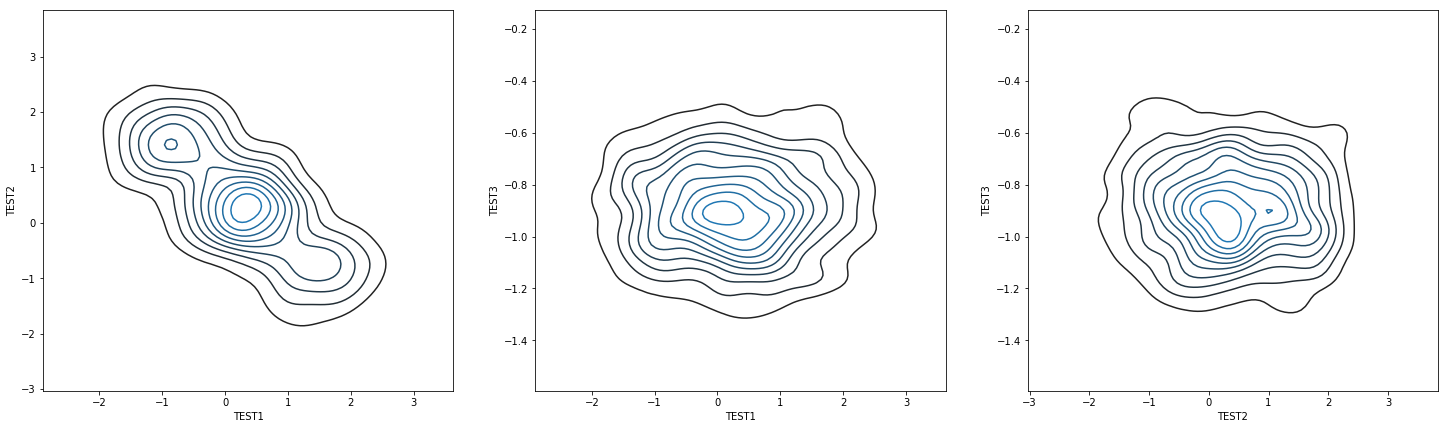

In [10]:
# HEALTHY class
print("HEALTHY")
print("SURGERY")
print("MEDICATION")

q_ = x_train[y_train == "HEALTHY", :]

plt.subplots(figsize = [25, 7])
plt.subplot(1, 3, 1)
sns.kdeplot(q_[:,0:2])
plt.xlabel("TEST1")
plt.ylabel("TEST2")

plt.subplot(1, 3, 2)
sns.kdeplot(np.concatenate([q_[:, 0].reshape(q_.shape[0], 1), q_[:, 2].reshape(q_.shape[0], 1)], axis = 1))
plt.xlabel("TEST1")
plt.ylabel("TEST3")

plt.subplot(1, 3, 3)
sns.kdeplot(np.concatenate([q_[:, 1].reshape(q_.shape[0], 1), q_[:, 2].reshape(q_.shape[0], 1)], axis = 1))
plt.xlabel("TEST2")
plt.ylabel("TEST3")

# SURGERY class
q_ = x_train[y_train == "SURGERY", :]

plt.subplots(figsize = [25, 7])
plt.title("Class conditional density for HEALTHY class")
plt.subplot(1, 3, 1)
sns.kdeplot(q_[:,0:2])
plt.xlabel("TEST1")
plt.ylabel("TEST2")

plt.subplot(1, 3, 2)
sns.kdeplot(np.concatenate([q_[:, 0].reshape(q_.shape[0], 1), q_[:, 2].reshape(q_.shape[0], 1)], axis = 1))
plt.xlabel("TEST1")
plt.ylabel("TEST3")

plt.subplot(1, 3, 3)
sns.kdeplot(np.concatenate([q_[:, 1].reshape(q_.shape[0], 1), q_[:, 2].reshape(q_.shape[0], 1)], axis = 1))
plt.xlabel("TEST2")
plt.ylabel("TEST3")

# MEDICATION class
q_ = x_train[y_train == "MEDICATION", :]

plt.subplots(figsize = [25, 7])
plt.subplot(1, 3, 1)
sns.kdeplot(q_[:,0:2])
plt.xlabel("TEST1")
plt.ylabel("TEST2")

plt.subplot(1, 3, 2)
sns.kdeplot(np.concatenate([q_[:, 0].reshape(q_.shape[0], 1), q_[:, 2].reshape(q_.shape[0], 1)], axis = 1))
plt.xlabel("TEST1")
plt.ylabel("TEST3")

plt.subplot(1, 3, 3)
sns.kdeplot(np.concatenate([q_[:, 1].reshape(q_.shape[0], 1), q_[:, 2].reshape(q_.shape[0], 1)], axis = 1))
plt.xlabel("TEST2")
plt.ylabel("TEST3")

## Bayes classifier (MLE)

In [7]:
num_alphas = {
    "HEALTHY" : 1,
    "SURGERY" : 1,
    "MEDICATION" : 1
}

classifier = BayesClassifier(algorithm = "MLE")
classifier.Fit(x_train, y_train, num_alphas)
print("Training accuracy:", classifier.training_accuracy)

predictions = classifier.Predict(x_test)
print("Test Accuracy =", Accuracy(predictions, y_test))
print("Precision =", Precision(predictions, y_test))
print("Recall =", Recall(predictions, y_test))
print("F1score =", F1score(predictions, y_test))

Training accuracy: 0.9033333333333333
Test Accuracy = 0.8976666666666666
Precision = {'HEALTHY': array([0.95343915]), 'SURGERY': array([0.85335856]), 'MEDICATION': array([0.89178357])}
Recall = {'HEALTHY': array([0.901]), 'SURGERY': array([0.902]), 'MEDICATION': array([0.89])}
F1score = {'HEALTHY': array([0.92647815]), 'SURGERY': array([0.87700535]), 'MEDICATION': array([0.89089089])}


## Bayes classifier (EM)

In [11]:
num_alphas = {
    "HEALTHY" : 4,
    "SURGERY" : 4,
    "MEDICATION" : 4
}

classifier = BayesClassifier(algorithm = "EM")
classifier.Fit(x_train, y_train, num_alphas)
print("Training accuracy:", classifier.training_accuracy)

predictions = classifier.Predict(x_test)
print("Test Accuracy =", Accuracy(predictions, y_test))
print("Precision =", Precision(predictions, y_test))
print("Recall =", Recall(predictions, y_test))
print("F1score =", F1score(predictions, y_test))

Training accuracy: 0.9046666666666666
Test Accuracy = 0.9026666666666666
Precision = {'HEALTHY': array([0.94444444]), 'SURGERY': array([0.8623327]), 'MEDICATION': array([0.90427699])}
Recall = {'HEALTHY': array([0.918]), 'SURGERY': array([0.902]), 'MEDICATION': array([0.888])}
F1score = {'HEALTHY': array([0.93103448]), 'SURGERY': array([0.88172043]), 'MEDICATION': array([0.89606458])}


# Parzen window (hypercube window)

<IPython.core.display.Javascript object>


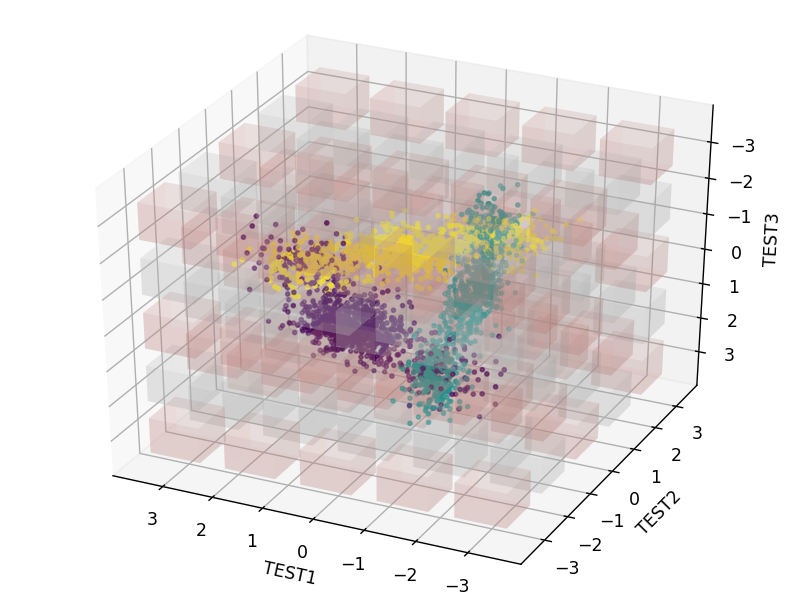

In [7]:
def cuboid_data(center, size=(1,1,1)):
    # suppose axis direction: x: to left; y: to inside; z: to upper
    # get the (left, outside, bottom) point
    o = [a - b / 2 for a, b in zip(center, size)]
    # get the length, width, and height
    l, w, h = size
    x = [[o[0], o[0] + l, o[0] + l, o[0], o[0]],  # x coordinate of points in bottom surface
         [o[0], o[0] + l, o[0] + l, o[0], o[0]],  # x coordinate of points in upper surface
         [o[0], o[0] + l, o[0] + l, o[0], o[0]],  # x coordinate of points in outside surface
         [o[0], o[0] + l, o[0] + l, o[0], o[0]]]  # x coordinate of points in inside surface
    y = [[o[1], o[1], o[1] + w, o[1] + w, o[1]],  # y coordinate of points in bottom surface
         [o[1], o[1], o[1] + w, o[1] + w, o[1]],  # y coordinate of points in upper surface
         [o[1], o[1], o[1], o[1], o[1]],          # y coordinate of points in outside surface
         [o[1] + w, o[1] + w, o[1] + w, o[1] + w, o[1] + w]]    # y coordinate of points in inside surface
    z = [[o[2], o[2], o[2], o[2], o[2]],                        # z coordinate of points in bottom surface
         [o[2] + h, o[2] + h, o[2] + h, o[2] + h, o[2] + h],    # z coordinate of points in upper surface
         [o[2], o[2], o[2] + h, o[2] + h, o[2]],                # z coordinate of points in outside surface
         [o[2], o[2], o[2] + h, o[2] + h, o[2]]]                # z coordinate of points in inside surface
    return np.array(x), np.array(y), np.array(z)

def plotCubeAt(pos=(0,0,0), c="b", alpha=0.1, ax=None):
    # Plotting N cube elements at position pos
    if ax !=None:
        X, Y, Z = cuboid_data([pos[0], pos[1], pos[2]])
        ax.plot_surface(X, Y, Z, color=c, rstride=1, cstride=1, alpha=0.1)

def plotMatrix(ax, x, y, z, data, cmap="jet", alpha=0.1):
    # plot a Matrix 
    norm = matplotlib.colors.Normalize(vmin=data.min(), vmax=data.max())
    colors = lambda i,j,k : matplotlib.cm.ScalarMappable(norm=norm,cmap = cmap).to_rgba(data[i,j,k]) 
    for i, xi in enumerate(x):
            for j, yi in enumerate(y):
                for k, zi, in enumerate(z):
                    plotCubeAt(pos=(xi, yi, zi), c=colors(i,j,k), alpha=alpha,  ax=ax)

# x and y and z coordinates
X = np.linspace(-3, 3, 5)
Y = np.linspace(-3, 3, 5)
Z = np.linspace(-3, 3, 5)
# data_value = np.ones(len(X), len(Y), len(Z))
# data_value = np.random.randint(1,4, size=(len(X), len(Y), len(Z)))
data_value_ = np.array([[0, 1, 0, 1, 0], [1, 0, 1, 0 ,1], [0, 1, 0, 1, 0], [1, 0, 1, 0 ,1], [0, 1, 0, 1, 0]])
data_value = np.array([data_value_,data_value_,data_value_,data_value_,data_value_])

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection='3d')

ax.scatter(x_train[:, 0], x_train[:, 1], x_train[:, 2], c = y_, marker = ".")
ax.set_xlabel("TEST1")
ax.set_ylabel("TEST2")
ax.set_zlabel("TEST3")

plotMatrix(ax, X, Y, Z, data_value, cmap="Pastel1")

In [30]:
h_array = np.linspace(0.05, 1, num = 20)
accuracy = pd.DataFrame()
accuracy["h"] = h_array
acc = []
for h in h_array:
    classifier = ParzenWindow(h = h)
    classifier.Fit(x_train, y_train)
    acc.append(Accuracy(classifier.Predict(x_test), y_test))
accuracy["accuracy"] = acc

In [31]:
accuracy

,h,accuracy
0,0.05,0.355333
1,0.10,0.473667
2,0.15,0.628667
3,0.20,0.744000
4,0.25,0.801667
5,0.30,0.837667
6,0.35,0.856667
7,0.40,0.872000
8,0.45,0.879000
9,0.50,0.884667


Text(0.5,1,'Medical data Parzen window (hypercube) performance vs window width')

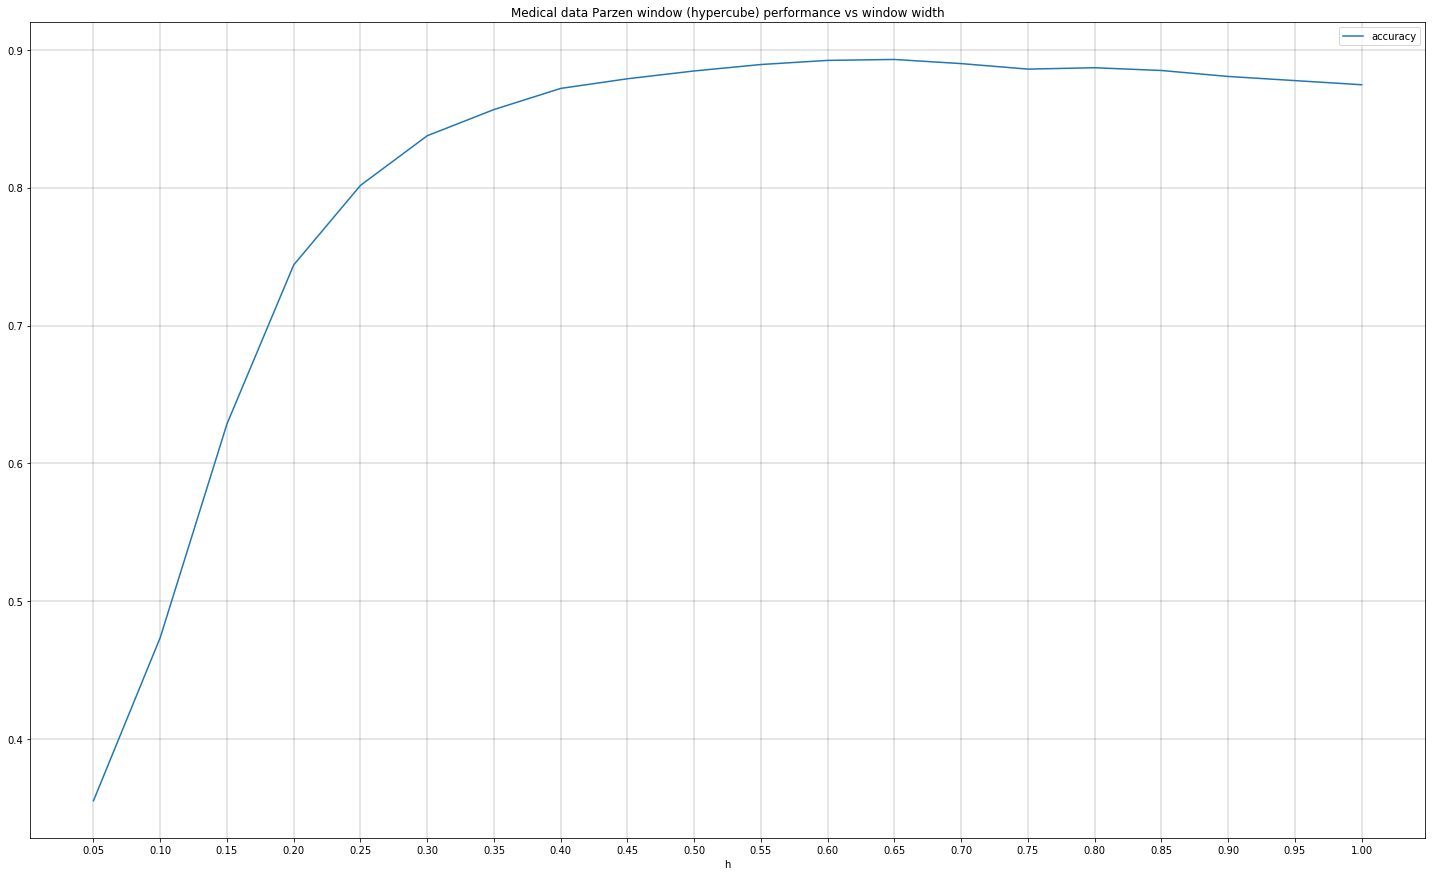

In [34]:
fig, ax = plt.subplots()
accuracy.plot(x = "h", y = "accuracy", figsize = [25, 15], ax = ax)
plt.xticks(h_array)
ax.grid(linestyle = "-", linewidth = '0.2', color='black')
plt.title("Medical data Parzen window (hypercube) performance vs window width")

# Parzen window (Gaussian window)

In [5]:
h_array = np.linspace(0.05, 1, num = 20)
accuracy = pd.DataFrame()
accuracy["h"] = h_array
acc = []
for h in h_array:
    classifier = ParzenWindow(h = h, kernel = "Gaussian")
    classifier.Fit(x_train, y_train)
    acc.append(Accuracy(classifier.Predict(x_test), y_test))
accuracy["accuracy"] = acc

In [36]:
accuracy

,h,accuracy
0,0.05,0.872667
1,0.10,0.888000
2,0.15,0.898000
3,0.20,0.899333
4,0.25,0.895000
5,0.30,0.888000
6,0.35,0.884000
7,0.40,0.875667
8,0.45,0.868333
9,0.50,0.865667


Text(0.5,1,'Medical data Parzen window (Gaussian) performance vs window width')

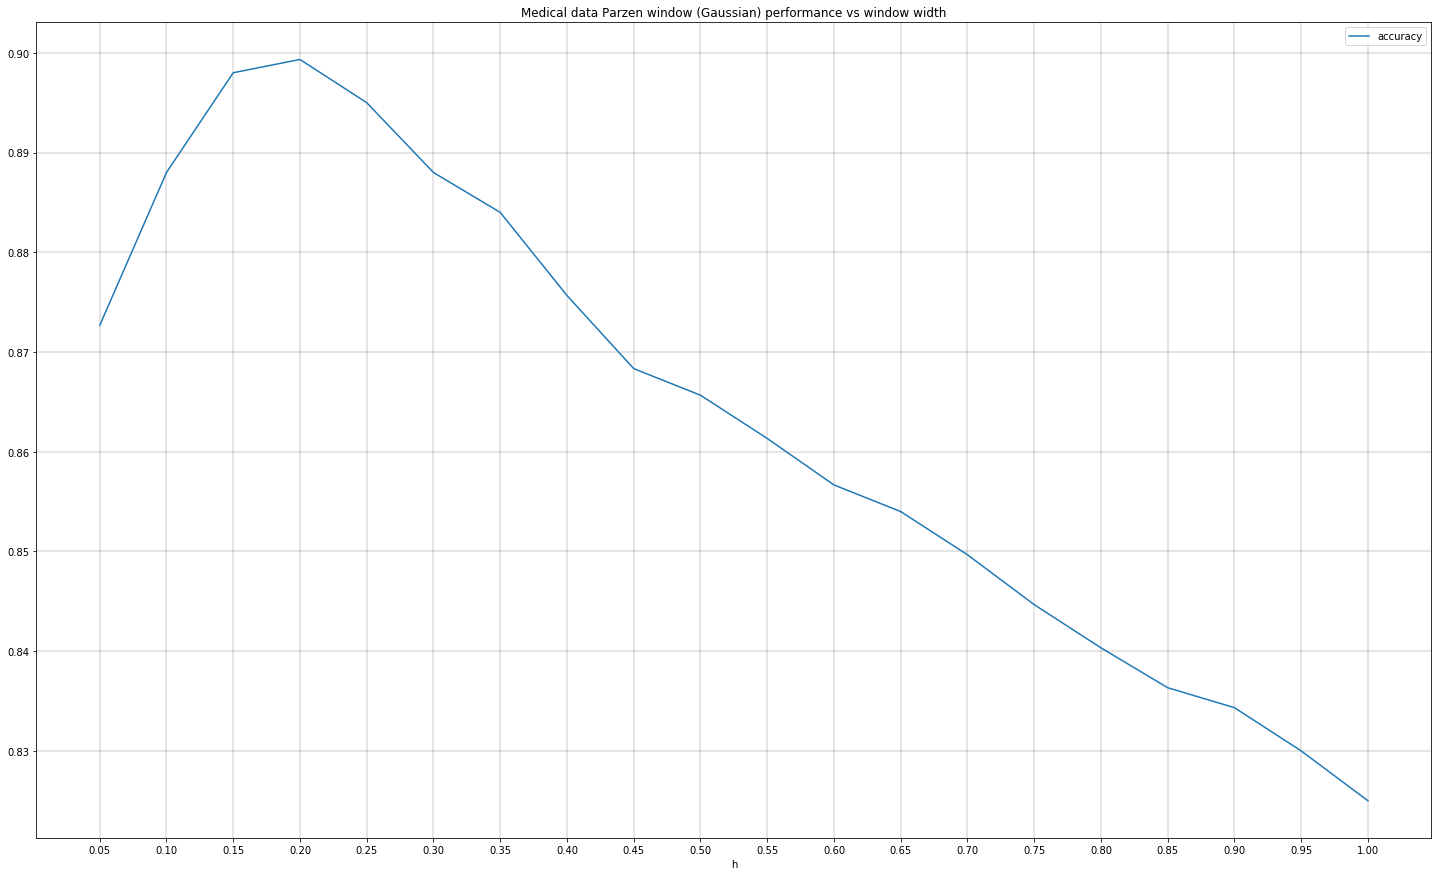

In [37]:
fig, ax = plt.subplots()
accuracy.plot(x = "h", y = "accuracy", figsize = [25, 15], ax = ax)
plt.xticks(h_array)
ax.grid(linestyle = "-", linewidth = '0.2', color='black')
plt.title("Medical data Parzen window (Gaussian) performance vs window width")

# kNN

In [11]:
distance_metrics = ["Euclidean", "Manhattan", "Chebyshev", "Minkowski"]

accuracy = pd.DataFrame()
accuracy["k"] = range(1, 51)

precision = pd.DataFrame()
precision["k"] = range(1, 51)

recall = pd.DataFrame()
recall["k"] = range(1, 51)

f1_score = pd.DataFrame()
f1_score["k"] = range(1, 51)

for j in distance_metrics:
    classifier = kNNClassifier(distance_metric = j)

    accuracy_ = []
    precision_ = []
    recall_ = []
    f1_score_ = []
    for k in range(1, 51):
        predictions = classifier.Predict(x_train, y_train, x_test, k)
        predictions = np.array(predictions)
        accuracy_.append(Accuracy(predictions, y_test))
        precision_.append(Precision(predictions, y_test))
        recall_.append(Recall(predictions, y_test))
        f1_score_.append(F1score(predictions, y_test))
        
        print(k)
    
    accuracy[j] = accuracy_
    precision[j] = precision_
    recall[j] = recall_
    f1_score[j] = f1_score_

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [12]:
accuracy

,k,Euclidean,Manhattan,Chebyshev,Minkowski
0,1,0.865000,0.864333,0.869000,0.865667
1,2,0.873667,0.874000,0.875333,0.871667
2,3,0.882333,0.882667,0.878000,0.882333
3,4,0.882667,0.887000,0.877667,0.881000
4,5,0.882667,0.887667,0.884667,0.881667
5,6,0.889667,0.888667,0.884333,0.885667
6,7,0.887333,0.893000,0.890667,0.887333
7,8,0.891667,0.890667,0.889000,0.892667
8,9,0.894333,0.895000,0.895667,0.895000
9,10,0.891000,0.890000,0.891667,0.887667


Text(0.5,1,'Medical data knn performance vs k')

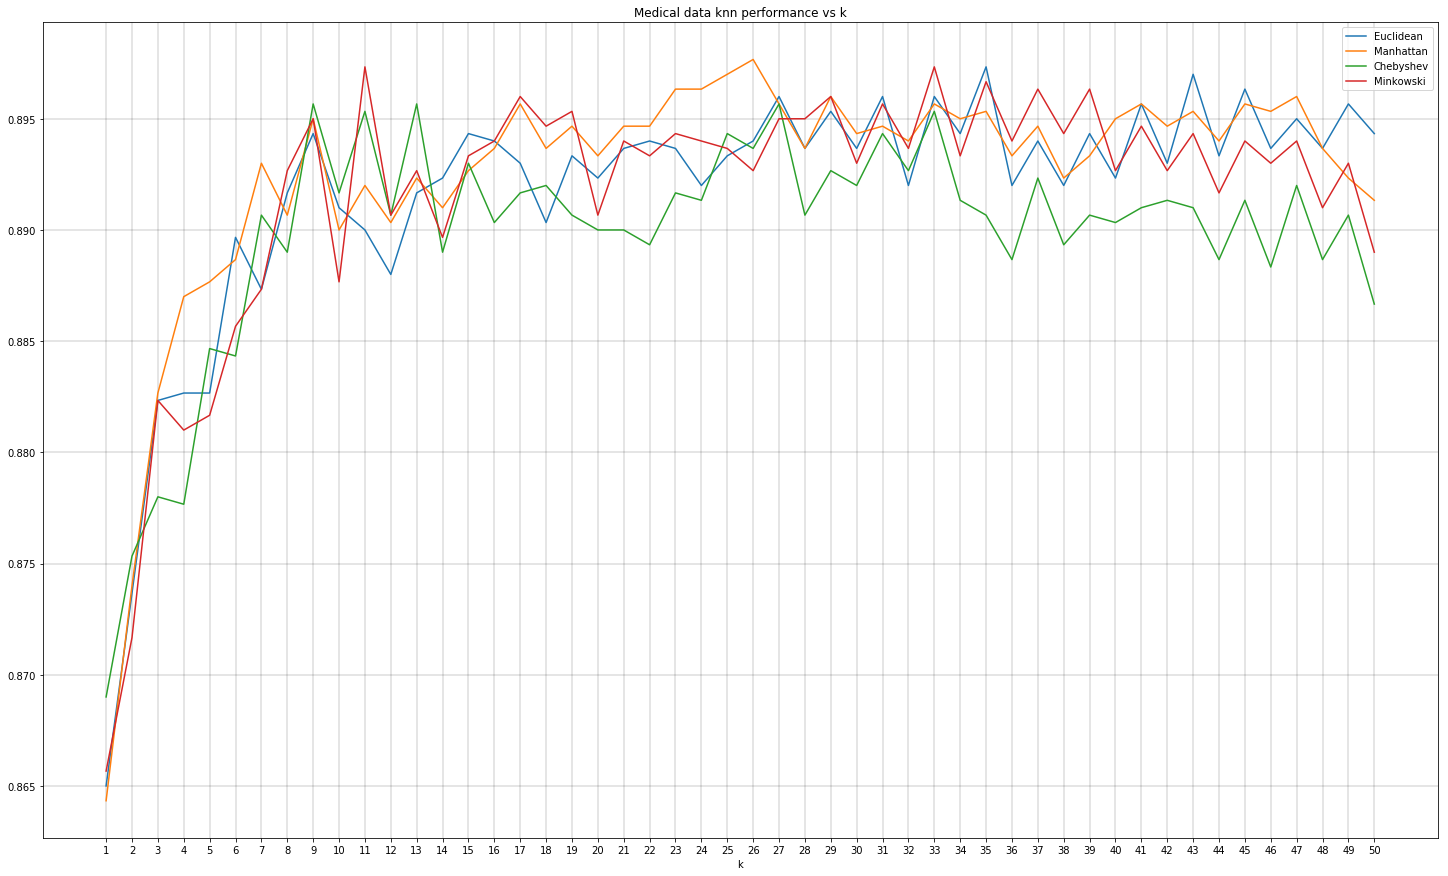

In [15]:
fig, ax = plt.subplots()
accuracy.plot(x = "k", y = distance_metrics, figsize = [25, 15], ax = ax)
plt.xticks(range(1, 51))
ax.grid(linestyle = "-", linewidth = '0.2', color='black')
plt.title("Medical data knn performance vs k")

In [42]:
precision[precision["k"] == 9]["Chebyshev"].item()

{'SURGERY': array([0.84172004]),
 'HEALTHY': array([0.96424702]),
 'MEDICATION': array([0.89126016])}

In [43]:
recall[recall["k"] == 9]["Chebyshev"].item()

{'SURGERY': array([0.92]),
 'HEALTHY': array([0.89]),
 'MEDICATION': array([0.877])}

In [44]:
f1_score[f1_score["k"] == 9]["Chebyshev"].item()

{'SURGERY': array([0.87912088]),
 'HEALTHY': array([0.92563703]),
 'MEDICATION': array([0.88407258])}

# k-means

In [46]:
loss = pd.DataFrame()
loss["k"] = range(2, 21)

loss_ = []
for k in range(2, 21):
    classifier = kmeansClassifier("Euclidean")
    classifier.Fit(x_train, k)
    loss_.append(classifier.ComputeLoss(x_train))
    print(k)
loss["loss"] = loss_

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [47]:
loss

,k,loss
0,2,5007.511646
1,3,3104.050224
2,4,2257.878749
3,5,1834.697432
4,6,1365.444315
5,7,1239.926602
6,8,1180.032270
7,9,1104.489549
8,10,1002.004650
9,11,992.042792


Text(0.5,1,'Medical data kmeans loss vs k')

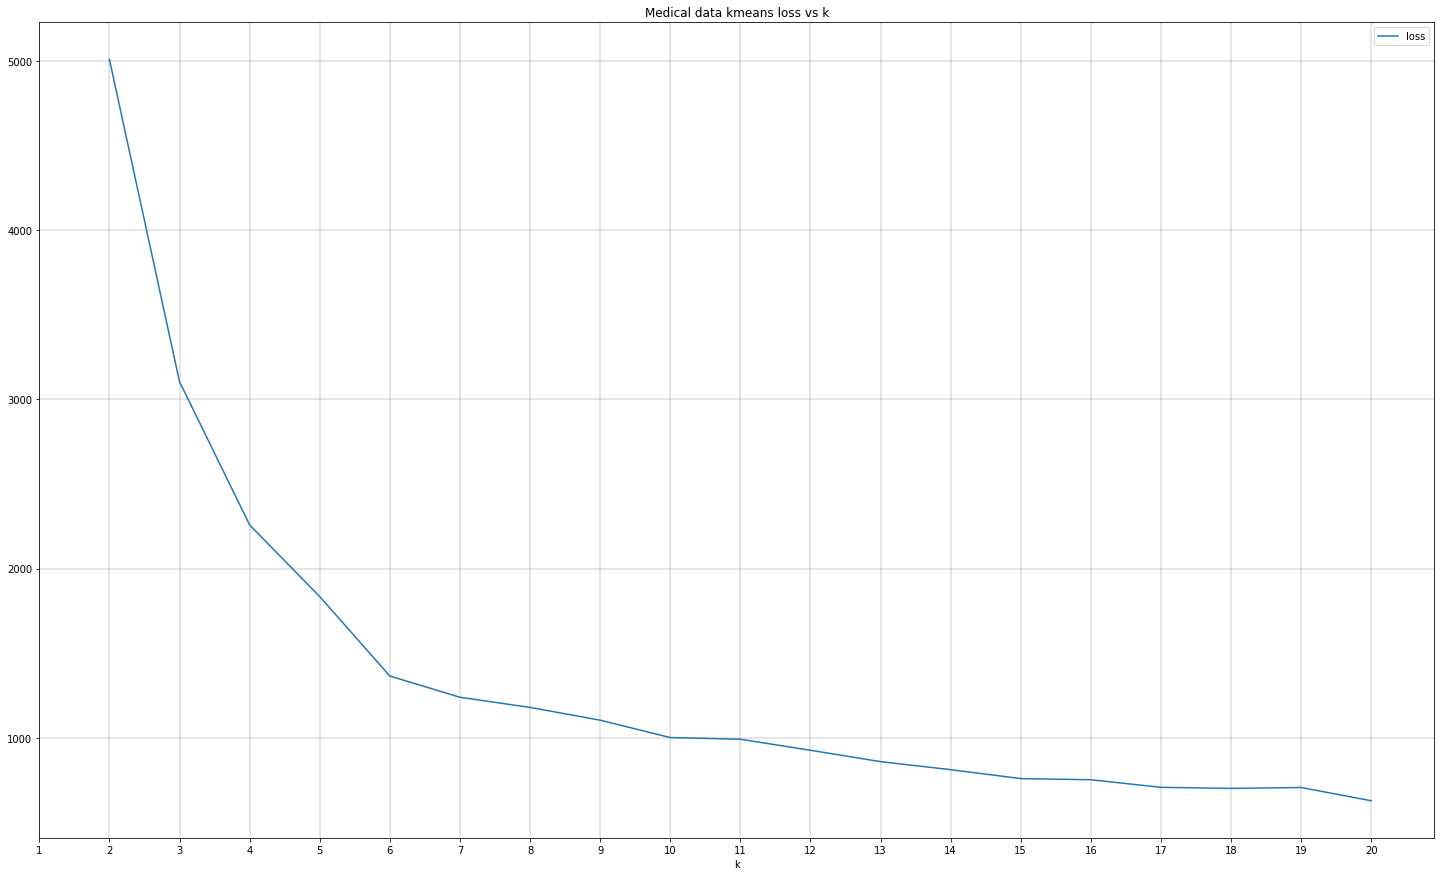

In [48]:
fig, ax = plt.subplots()
loss.plot(x = "k", y = "loss", figsize = [25, 15], ax = ax)
plt.xticks(range(1, 21))
ax.grid(linestyle = "-", linewidth = '0.2', color='black')
plt.title("Medical data kmeans loss vs k")

<IPython.core.display.Javascript object>


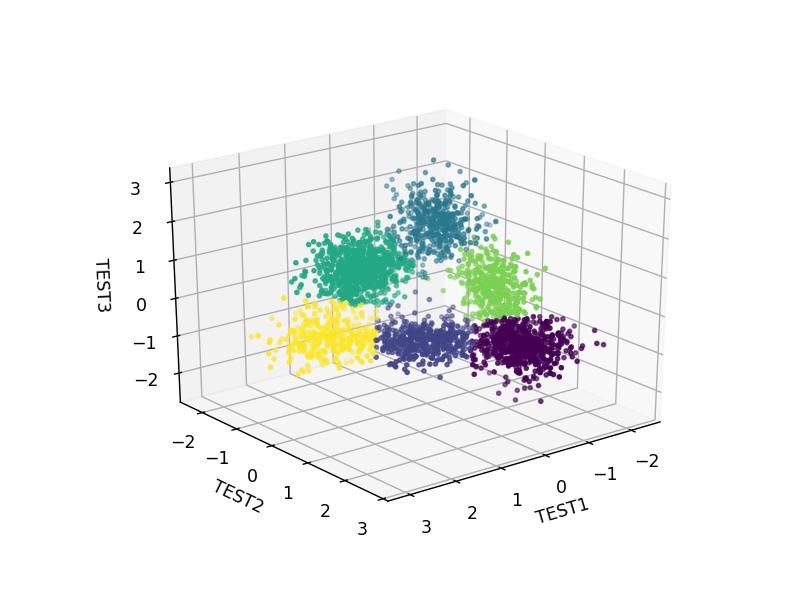

Text(0.5,0,'TEST3')

In [3]:
classifier = kmeansClassifier("Euclidean")
classifier.Fit(x_train, 6)
predictions = classifier.Predict(x_test)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_test[:, 0], x_test[:, 1], x_test[:, 2], c = predictions, marker = ".")

ax.set_xlabel("TEST1")
ax.set_ylabel("TEST2")
ax.set_zlabel("TEST3")